# <span style="color:#756bb1">Test delle Ipotesi (Test Statistici)</span>

#### <span style="color:#3182bd">Introduzione</span>

Test sul singolo valore medio

La funzione e le opzioni più comuni sono:
- verifica mu=mu_0, H_1 bidirezionale
    - t.test(campione,mu=mu_0)
- H_1: mu > mu_0 (unidirezionale "maggiore di")
    - t.test(campione,mu=mu_0,alternative="g")
- H_1: mu < mu_0 (unidirezionale "minore di")
    - t.test(campione,mu=mu_0,alternative="l")
- livello critico alpha (in genere, alpha=0.05)
    - t.test(campione,mu=mu_0,conf.level=1-alpha)

In [1]:
#install.packages("ISLR")
library(ISLR)

#### <span style="color:#3182bd">Dataset Orange Juice</span>

In [2]:
data(OJ)
cat("Summary of OJ data set")
summary(OJ)

cat("Mean of the PriceCH")
mean(OJ$PriceCH)

cat("Mean of the PriceMM")
mean(OJ$PriceMM)

cat("Head of the OJ data set")
head(OJ)

Summary of OJ data set

 Purchase WeekofPurchase     StoreID        PriceCH         PriceMM     
 CH:653   Min.   :227.0   Min.   :1.00   Min.   :1.690   Min.   :1.690  
 MM:417   1st Qu.:240.0   1st Qu.:2.00   1st Qu.:1.790   1st Qu.:1.990  
          Median :257.0   Median :3.00   Median :1.860   Median :2.090  
          Mean   :254.4   Mean   :3.96   Mean   :1.867   Mean   :2.085  
          3rd Qu.:268.0   3rd Qu.:7.00   3rd Qu.:1.990   3rd Qu.:2.180  
          Max.   :278.0   Max.   :7.00   Max.   :2.090   Max.   :2.290  
     DiscCH            DiscMM         SpecialCH        SpecialMM     
 Min.   :0.00000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.00000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.05186   Mean   :0.1234   Mean   :0.1477   Mean   :0.1617  
 3rd Qu.:0.00000   3rd Qu.:0.2300   3rd Qu.:0.0000   3rd Qu.:0.0000  
 Max.   :0.50000   Max.   :0.8000   Max.   :1.0000   Max.   :1.0000  

Mean of the PriceCH

[1] 1.867421

Mean of the PriceMM

[1] 2.085411

Head of the OJ data set

Purchase WeekofPurchase StoreID PriceCH PriceMM DiscCH DiscMM SpecialCH
1 CH       237            1       1.75    1.99    0.00   0.0    0        
2 CH       239            1       1.75    1.99    0.00   0.3    0        
3 CH       245            1       1.86    2.09    0.17   0.0    0        
4 MM       227            1       1.69    1.69    0.00   0.0    0        
5 CH       228            7       1.69    1.69    0.00   0.0    0        
6 CH       230            7       1.69    1.99    0.00   0.0    0        
  SpecialMM LoyalCH  SalePriceMM SalePriceCH PriceDiff Store7 PctDiscMM
1 0         0.500000 1.99        1.75         0.24     No     0.000000 
2 1         0.600000 1.69        1.75        -0.06     No     0.150754 
3 0         0.680000 2.09        1.69         0.40     No     0.000000 
4 0         0.400000 1.69        1.69         0.00     No     0.000000 
5 0         0.956535 1.69        1.69         0.00     Yes    0.000000 
6 1         0.965228 1.99        1.69         0.30     Yes    0.000000 
  PctDiscCH ListPriceDiff STORE
1 0.000000  0.24          1    
2 0.000000  0.24          1    
3 0.091398  0.23          1    
4 0.000000  0.00          1    
5 0.000000  0.00          0    
6 0.000000  0.30          0

Estraiamo un campione con le prime 30 osservazioni

In [3]:
PrezzoCH <- OJ$PriceCH[1:30]
PrezzoMM <- OJ$PriceMM[1:30]

PrezzoCH
PrezzoMM

[1] 1.75 1.75 1.86 1.69 1.69 1.69 1.69 1.75 1.75 1.75 1.86 1.86 1.99 1.86 2.06
[16] 2.06 1.75 1.86 1.86 1.86 1.86 1.76 1.86 1.86 1.86 1.86 1.86 1.86 1.86 2.06

[1] 1.99 1.99 2.09 1.69 1.69 1.99 1.99 1.99 1.99 1.99 2.09 2.13 2.13 2.13 2.13
[16] 2.13 1.99 2.18 2.18 2.18 2.18 2.18 2.18 2.13 2.13 2.13 2.13 2.13 2.13 2.13

## <span style="color:#e6550d">Test sul <i><strong><u>valore medio</u></strong></i> con <i><strong><u>varianza nota</u></strong></i></span>

![Screenshot 2024-01-01 at 10.11.43.png](<attachment:Screenshot 2024-01-01 at 10.11.43.png>)
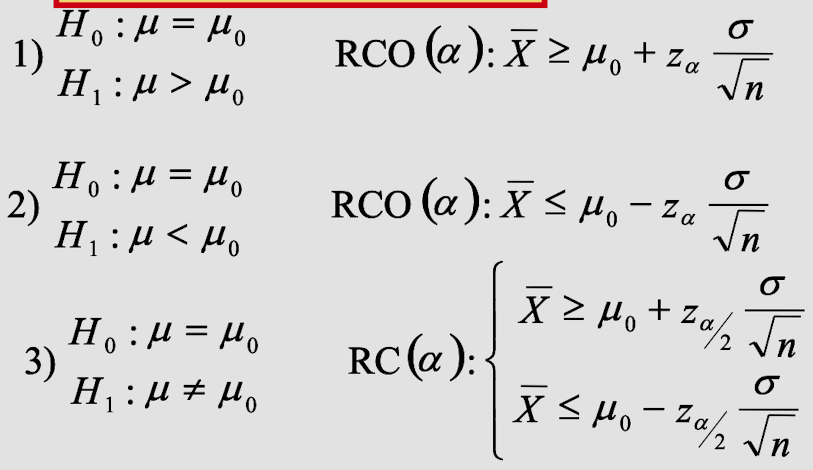

### <span style="color:#31a354">Esercizio Slides</span>

![Screenshot 2024-01-04 at 07.42.40.png](<attachment:Screenshot 2024-01-04 at 07.42.40.png>) ![Screenshot 2024-01-04 at 07.43.02.png](<attachment:Screenshot 2024-01-04 at 07.43.02.png>)
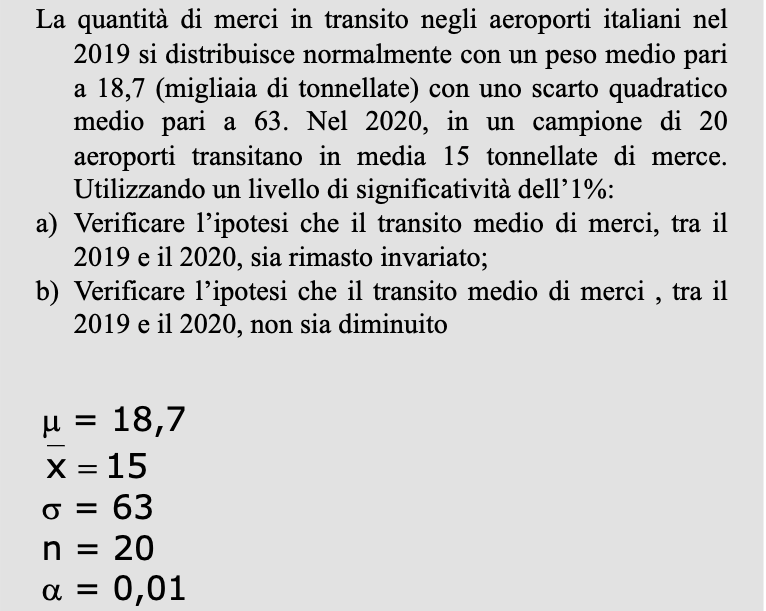
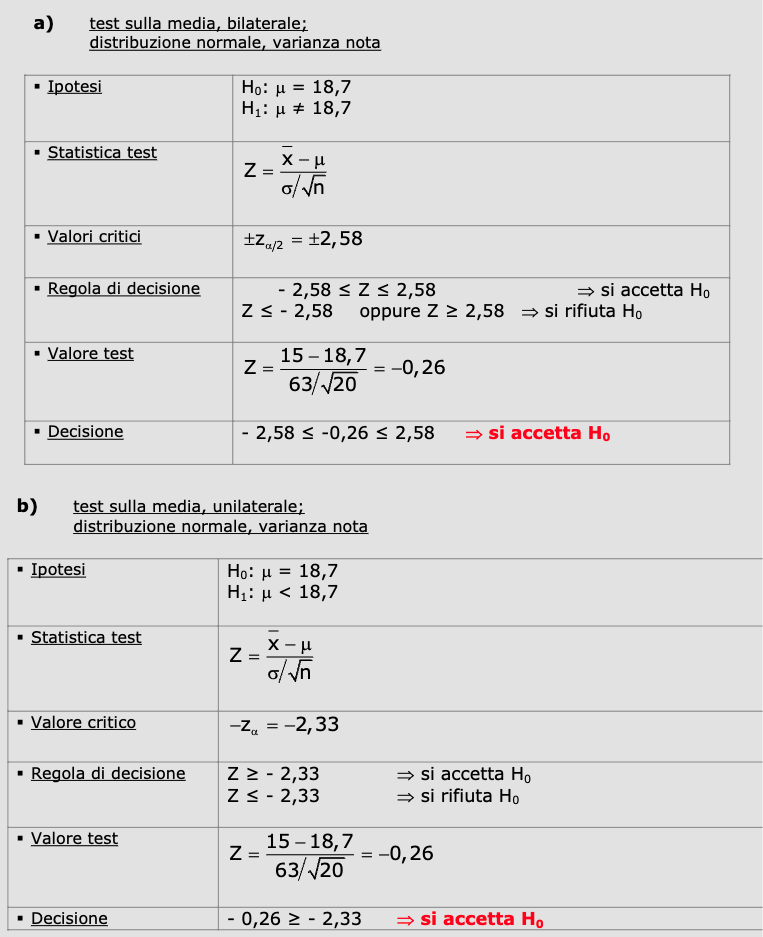

#### <span style="color:#3182bd">Test BILATERALE</span>
Verificare l'ipotesi che il transito medio di merci, tra il 2019 e il 2020, sia rimasto invariato

In [4]:
# popolazione
media_pop <- 18.7
sd_pop <- 63
# campione
n <- 20
media_camp <- 15
alpha <- 0.01

# Ipotesi H0: mu = 18.7, H1: mu != 18.7
# Valori critici
z1 <- qnorm(alpha/2)
z2 <- - qnorm(alpha/2)
cat("Valori critici: ", z1, z2, "\n")

# Calcolo del valore di z
z <- (media_camp - media_pop)/(sd_pop/sqrt(n))
cat("Valore della statistica test: ", z, "\n")

# Decisione
if (z < z1 | z > z2) {
  cat("Rifiuto H0")
} else {
  cat("NON Rifiuto H0")
}

Valori critici:  -2.575829 2.575829 
Valore della statistica test:  -0.2626493 
NON Rifiuto H0

#### <span style="color:#3182bd">Test UNILATERALE a SINISTRA</span>
Verificare l'ipotesi che il transito medio di merci, tra il 2019 e il 2020, non sia diminuito

In [5]:
# popolazione
media_pop <- 18.7
sd_pop <- 63
# campione
n <- 20
media_camp <- 15
alpha <- 0.01

# Ipotesi H0: mu = 18.7, H1: mu < 18.7
# Valore critico
z1 <- qnorm(alpha)
cat("Valore critico: ", z1, "\n")

# Calcolo del valore di z
z <- (media_camp - media_pop)/(sd_pop/sqrt(n))
cat("Valore della statistica test: ", z, "\n")

# Decisione
if (z < z1) {
  cat("Rifiuto H0")
} else {
  cat("NON Rifiuto H0")
}

Valore critico:  -2.326348 
Valore della statistica test:  -0.2626493 
NON Rifiuto H0

## <span style="color:#e6550d">Test sul <i><strong><u>valore medio</u></strong></i>  con <i><strong><u>varianza NON nota</u></strong></i></span>

![Screenshot 2024-01-01 at 10.12.17.png](<attachment:Screenshot 2024-01-01 at 10.12.17.png>)
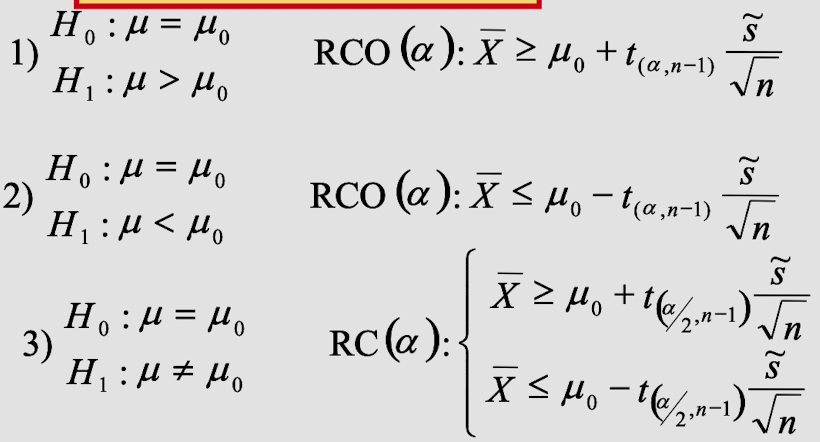

### <span style="color:#31a354">Esercizio Lezione</span>

#### <span style="color:#3182bd">t.test</span>

t.test(x, y = NULL,
       alternative = c("two.sided", "less", "greater"),
       mu = 0, paired = FALSE, var.equal = FALSE,
       conf.level = 0.95, ...)

<span style="color:#3182bd">paired</span>: appaiati. Stesso elemento valutato in due momenti diversi. Esempio del peso di una persona.</br>

<span style="color:#3182bd">p-value</span></br>
P-Value Interpretation
The p-value measures the probability of obtaining results as extreme as the observed results in the data if the null hypothesis were true.

A low p-value (typically below a predetermined threshold, often 0.05) indicates that the observed results are unlikely to have occurred by random chance assuming the null hypothesis is true. This suggests evidence against the null hypothesis and supports the alternative hypothesis.

A high p-value suggests that observed results could likely occur even if the null hypothesis were true. This doesn’t provide enough evidence to reject the null hypothesis.

P-value and Significance Level: The significance level (often denoted as α) is predetermined (e.g., 0.05). If the p-value is lower than this threshold, the results are considered statistically significant.

Probabilita' di fare una scelta sbagliata rifiutando l'ipotesi nulla

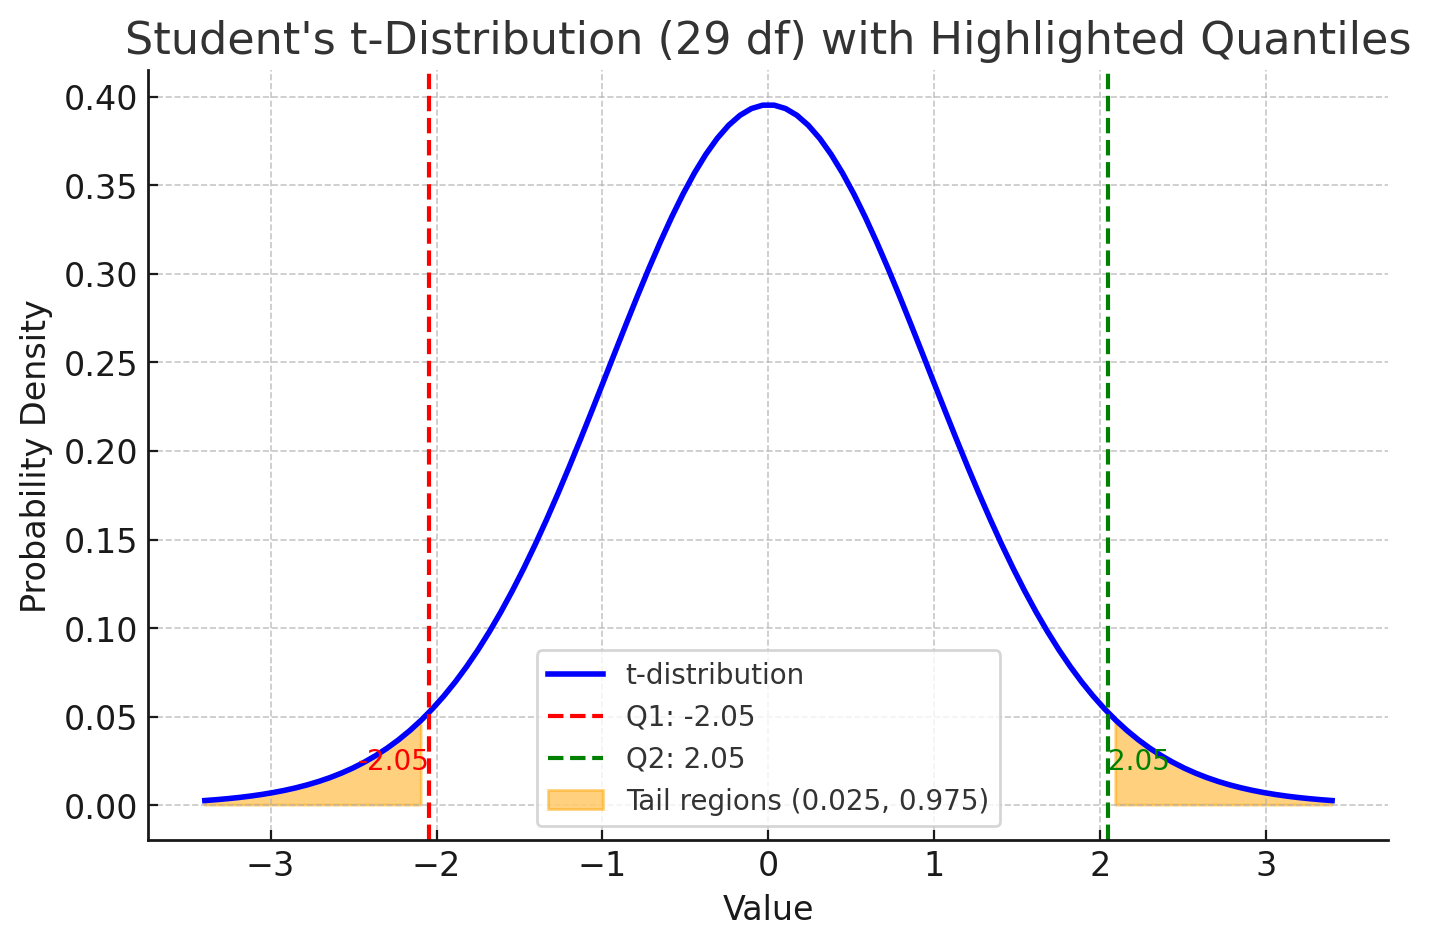

In [6]:
#? t.test

# test bidirezionale sulla media del campione PrezzoCH supponendo 
# che la media della popolazione sia 1.9
t.test(PrezzoCH,mu=1.9)


#? Results of t.test: explanation of the output
# 	One Sample t-test

# data:  PrezzoCH
# t = -3.3286, df = 29, p-value = 0.002384
## t is the t-statistic
## df is the degrees of freedom
## p-value is the p-value of the test
# alternative hypothesis: true mean is not equal to 1.9
## the alternative hypothesis is that the true mean is not equal to 1.9
# 95 percent confidence interval:
#  1.797213 1.875453
## the 95% confidence interval of the mean is 1.797213 1.875453
# sample estimates:
# mean of x
#  1.836333
## the sample mean is 1.836333

cat("Using t di Student", "\n")
cat("pt (-3.3286,29)", pt(-3.3286,29) * 2, "\n") # Questo è il p-value
cat("qt (0.025,29)", qt(0.025,29), "\n")
cat("qt (0.975,29)", qt(0.975,29), "\n")


	One Sample t-test

data:  PrezzoCH
t = -3.3286, df = 29, p-value = 0.002384
alternative hypothesis: true mean is not equal to 1.9
95 percent confidence interval:
 1.797213 1.875453
sample estimates:
mean of x 
 1.836333 


Using t di Student 
pt (-3.3286,29) 0.002384007 
qt (0.025,29) -2.04523 
qt (0.975,29) 2.04523 


I valori +- 1.96 corrispondono ai quantili 0.025 e 0.975 di una distribuzione normale.</br>
Derivano dal fatto che il nostro alpha di default e pari a 0.05
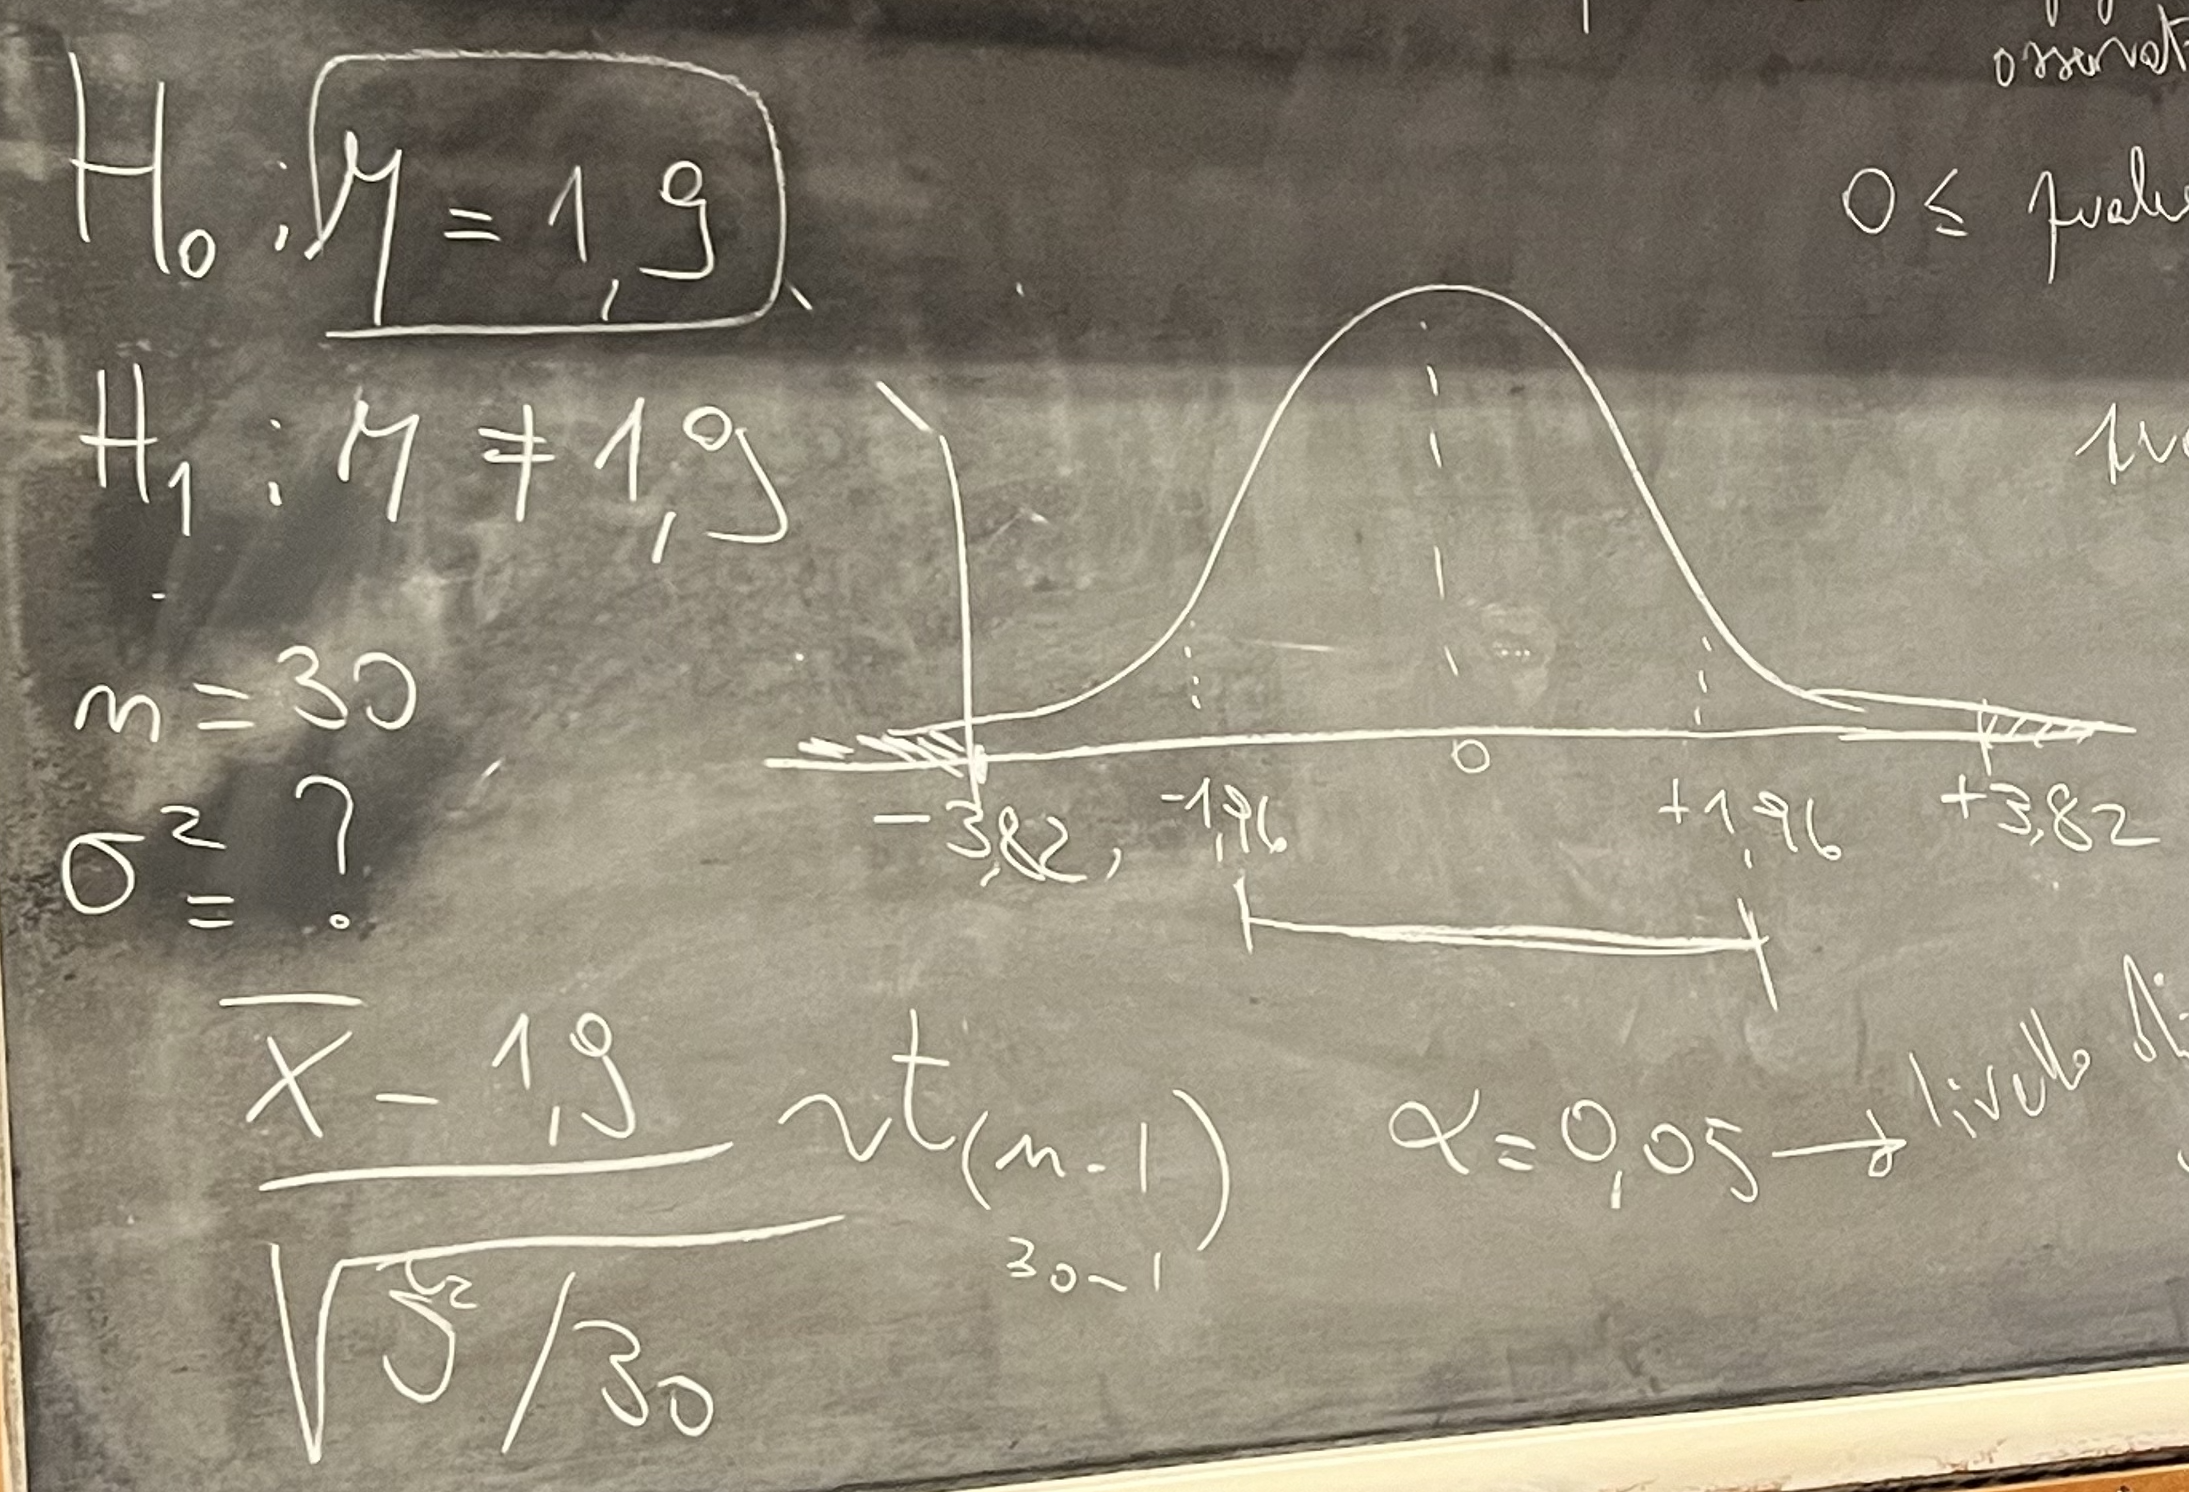

In [7]:
cat("PrezzoMM supponendo che la media della popolazione sia 1.9")
t.test(PrezzoMM,mu=1.9)
# Il prezzo di MM è significativamente diverso da 1.9

cat("PrezzoCH supponendo che la media della popolazione sia 1.85")
t.test(PrezzoCH,mu=1.85)

cat("PrezzoCH supponendo che la media della popolazione sia 1.85, test unilaterale a sinistra")
t.test(PrezzoCH,mu=1.85, alternative = "less")

cat("PrezzoCH supponendo che la media della popolazione sia 1.85, test unilaterale a destra")
t.test(PrezzoCH,mu=1.85, alternative = "greater")

PrezzoMM supponendo che la media della popolazione sia 1.9


	One Sample t-test

data:  PrezzoMM
t = 7.4498, df = 29, p-value = 3.285e-08
alternative hypothesis: true mean is not equal to 1.9
95 percent confidence interval:
 2.023813 2.117520
sample estimates:
mean of x 
 2.070667 


PrezzoCH supponendo che la media della popolazione sia 1.85


	One Sample t-test

data:  PrezzoCH
t = -0.71451, df = 29, p-value = 0.4806
alternative hypothesis: true mean is not equal to 1.85
95 percent confidence interval:
 1.797213 1.875453
sample estimates:
mean of x 
 1.836333 


PrezzoCH supponendo che la media della popolazione sia 1.85, test unilaterale a sinistra


	One Sample t-test

data:  PrezzoCH
t = -0.71451, df = 29, p-value = 0.2403
alternative hypothesis: true mean is less than 1.85
95 percent confidence interval:
     -Inf 1.868833
sample estimates:
mean of x 
 1.836333 


PrezzoCH supponendo che la media della popolazione sia 1.85, test unilaterale a destra


	One Sample t-test

data:  PrezzoCH
t = -0.71451, df = 29, p-value = 0.7597
alternative hypothesis: true mean is greater than 1.85
95 percent confidence interval:
 1.803833      Inf
sample estimates:
mean of x 
 1.836333 


In [8]:
# Ripetere il test precedente con un campione di 100 elementi
# utilizzando quindi un campione di dimensione maggiore

cat("Utilizzando un campione di 100 elementi")
set.seed(123)
ind = sample(1:nrow(OJ), size = 100, replace = T)
ind

campione = OJ[ind,]

t.test(campione$PriceCH,mu=1.85)

pt(0.96148,99) * 2 #! This value should be equal to the p-value of the test
qt(0.025,99)
qt(0.975,99)

Utilizzando un campione di 100 elementi

[1]  415  463  179  526  195  938 1038  665  602  709 1011  953  348 1017  840
 [16]   26  519  211  932  593  555  373  844  544  490  905  937 1047  923  956
 [31]  309  166  217  581   72  588  141  722  859  153  294  277   41  431   90
 [46]  316  528  774  747  456  598 1063  752  374   34  516   13   69  755  409
 [61]  928 1006  537  983  291  671  121  480   67 1014  165  236  610  330  726
 [76]  127  212  686  814  931  878  243  847  983  619  477  151  666  767  160
 [91]  155  426 1029  326  789  985   39  822  986  137


	One Sample t-test

data:  campione$PriceCH
t = 0.99424, df = 99, p-value = 0.3225
alternative hypothesis: true mean is not equal to 1.85
95 percent confidence interval:
 1.839744 1.880856
sample estimates:
mean of x 
   1.8603 


[1] 1.661347

[1] -1.984217

[1] 1.984217

### <span style="color:#31a354">Esercizio Slides</span>

![Screenshot 2024-01-04 at 07.44.14.png](<attachment:Screenshot 2024-01-04 at 07.44.14.png>) ![Screenshot 2024-01-04 at 07.44.22.png](<attachment:Screenshot 2024-01-04 at 07.44.22.png>)
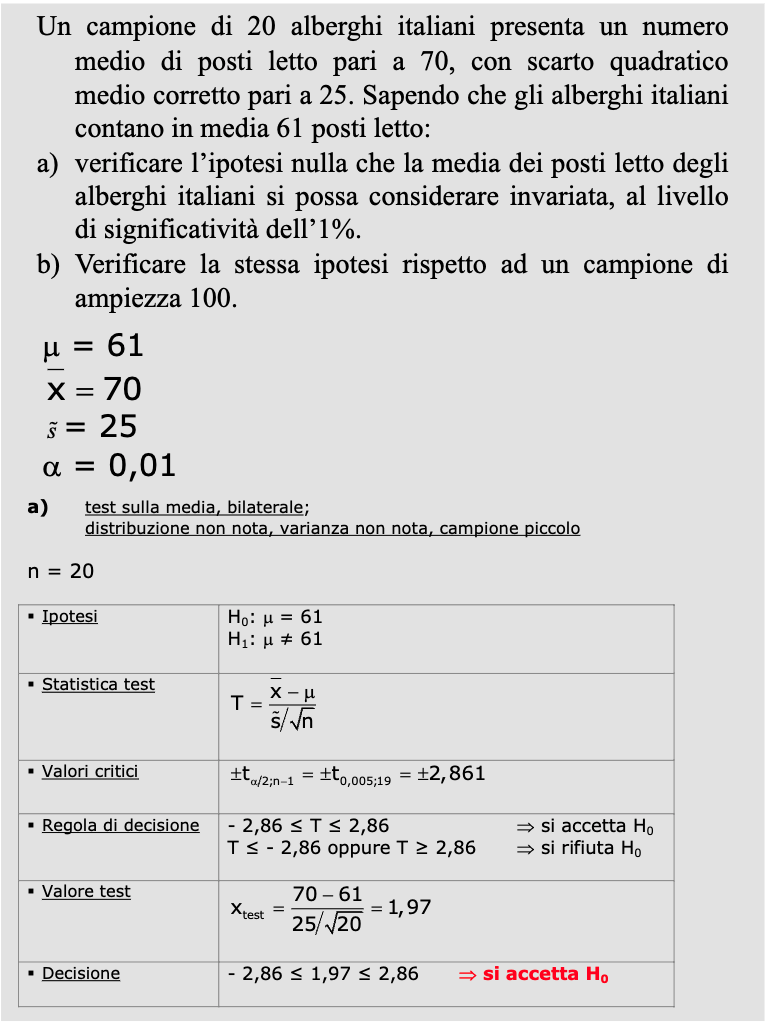
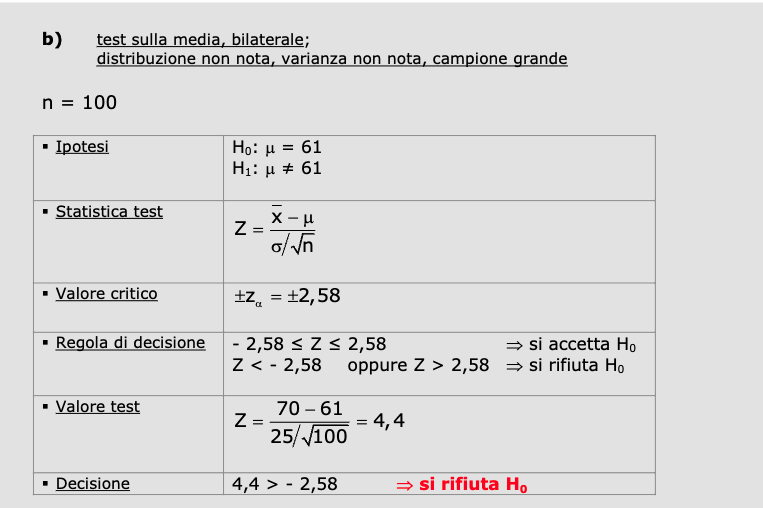

#### <span style="color:#3182bd">test sulla media, bilaterale</br>distribuzione non nota, varianza non nota, CAMPIONE PICCOLO</span>
verificare l'ipotesi nulla che la media dei posti letto degli alberghi italiani si possa considerare invariata, al livello di significatività dell'1%.

In [9]:
# Campione
n <- 20
media_camp <- 70
sd_camp_corretto <- 25
# Popolazione
media_pop <- 61

# Ipotesi H0: mu = 61, H1: mu != 61
# Valori critici
t1 <- qt(alpha/2, df = n - 1)
t2 <- - qt(alpha/2, df = n - 1)
cat("Valori critici: ", t1, t2, "\n")

# Calcolo del valore di t
t <- (media_camp - media_pop)/(sd_camp_corretto/sqrt(n))
cat("Valore della statistica test: ", t, "\n")

# Decisione
if (t < z1 | t > z2) {
  cat("Rifiuto H0")
} else {
  cat("NON Rifiuto H0")
}


Valori critici:  -2.860935 2.860935 
Valore della statistica test:  1.609969 
NON Rifiuto H0

#### <span style="color:#3182bd">test sulla media, bilaterale</br>distribuzione non nota, varianza non nota, CAMPIONE GRANDE</span>
verificare l'ipotesi nulla che la media dei posti letto degli alberghi italiani si possa considerare invariata, al livello di significatività dell'1%.

In [10]:
# Campione
n <- 100
media_camp <- 70
sd_camp_corretto <- 25
# Popolazione
media_pop <- 61

# Ipotesi H0: mu = 61, H1: mu != 61
# Valori critici
t1 <- qt(alpha/2, df = n - 1)
t2 <- - qt(alpha/2, df = n - 1)
cat("Valori critici: ", t1, t2, "\n")

# Calcolo del valore di t
t <- (media_camp - media_pop)/(sd_camp_corretto/sqrt(n))
cat("Valore della statistica test: ", t, "\n")

# Decisione
if (t < z1 | t > z2) {
  cat("Rifiuto H0")
} else {
  cat("NON Rifiuto H0")
}


Valori critici:  -2.626405 2.626405 
Valore della statistica test:  3.6 
Rifiuto H0

### <span style="color:#31a354">Valore soglia della Media</span>
Creare un codice per determinare un valore di soglia della media che mi permetta di capire per quali valori accetto o rifiuto l'ipotesi nulla ( con un ciclo for dovrei risolvere il problema)

Mean price ch 1.867421 
Mean price mm 2.085411 
Mean sample price ch 1.87305 
Mean sample price mm 2.07655 
Test per verificare il valore di soglia per accettare o rifiutare l'ipotesi nulla 
Valori soglia per accettare o rifiutare l'ipotesi nulla 1.847 1.885 


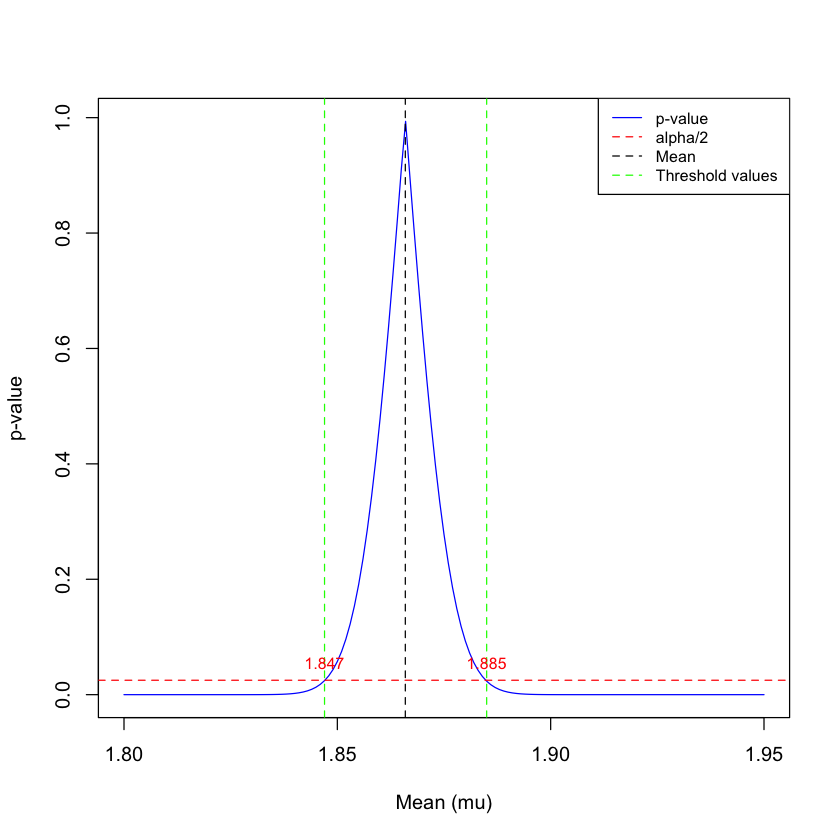

In [33]:
cat("Mean price ch", mean(OJ$PriceCH), "\n")
cat("Mean price mm", mean(OJ$PriceMM), "\n")

cat("Mean sample price ch", mean(campione$PriceCH), "\n")
cat("Mean sample price mm", mean(campione$PriceMM), "\n")

cat("Test per verificare il valore di soglia per accettare o rifiutare l'ipotesi nulla", "\n")

vector_mean <- c()
alpha <- 0.05
valori_soglia <- c()

for (i in seq(1.8, 1.95, 0.001)) {
  result <- t.test(PrezzoCH, mu = i)
  vector_mean <- c(vector_mean, result$p.value)
  if (result$p.value >= alpha/2 - 0.005 && result$p.value <= alpha/2 + 0.005) {
    valori_soglia <- c(valori_soglia, i)
  }
}

cat("Valori soglia per accettare o rifiutare l'ipotesi nulla", valori_soglia, "\n")


par(bg = "white")
plot(seq(1.8, 1.95, 0.001), 
  vector_mean, 
  type = "l", 
  col = "blue", 
  xlab = "Mean (mu)", 
  ylab = "p-value")

abline(h = alpha/2, col = "red", lty = 2)
abline(v = valori_soglia, col = "green", lty = 2)
abline(v = mean(PrezzoCH), col = "black", lty = 2)

# Annotating threshold values on the plot
for (val in valori_soglia) {
  text(val, alpha/2, labels = round(val, 3), pos = 3, cex = 0.8, col = "#ff2600")
}

legend("topright", 
  legend = c("p-value", "alpha/2", "Mean", "Threshold values"), 
  col = c("blue", "red", "black", "green"), 
  lty = c(1, 2, 2, 2), 
  cex = 0.8)

In [12]:
result <- t.test(PrezzoCH, mu = 1.80)
result$p.value

[1] 0.06748019

## <span style="color:#e6550d">Test sulla <i><strong><u>differenza tra medie</u></strong></i> con <i><strong><u>varianze note</u></strong></span>

![Screenshot 2024-01-01 at 10.13.46.png](<attachment:Screenshot 2024-01-01 at 10.13.46.png>)
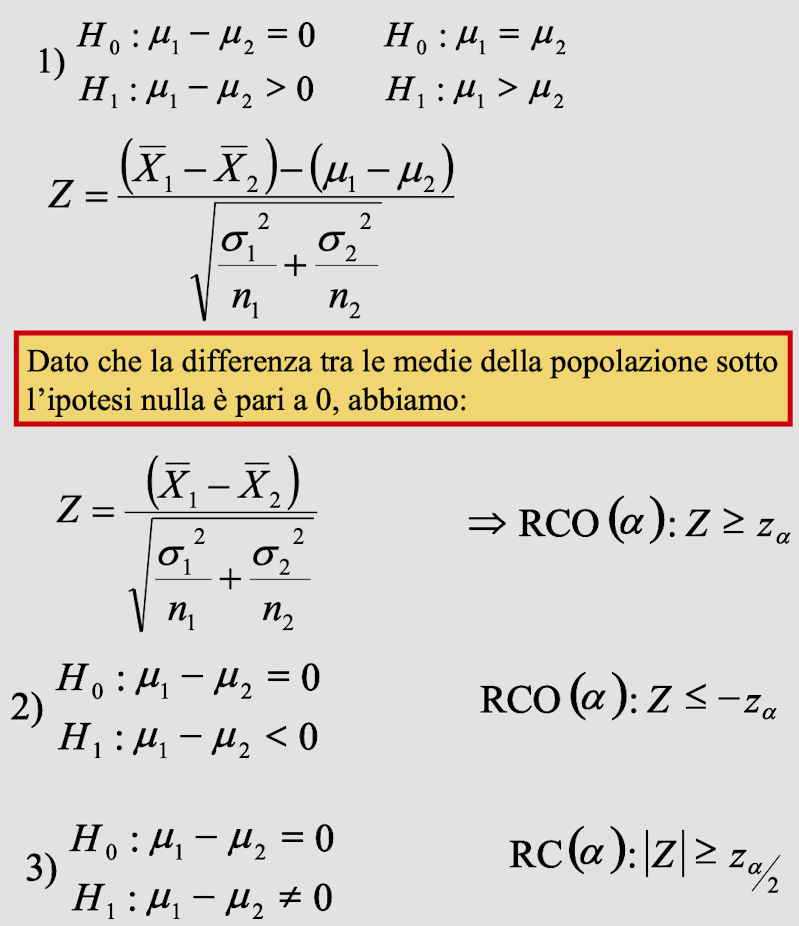

#### <span style="color:#3182bd">Esercizio Slides</span>
verificare l'uguaglianza tra le medie nell'ipotesi che le due varianze siano note e pari rispettivamente a 4000 e
3600.

![Screenshot 2024-01-04 at 08.22.22.png](<attachment:Screenshot 2024-01-04 at 08.22.22.png>) ![Screenshot 2024-01-04 at 08.22.41.png](<attachment:Screenshot 2024-01-04 at 08.22.41.png>)
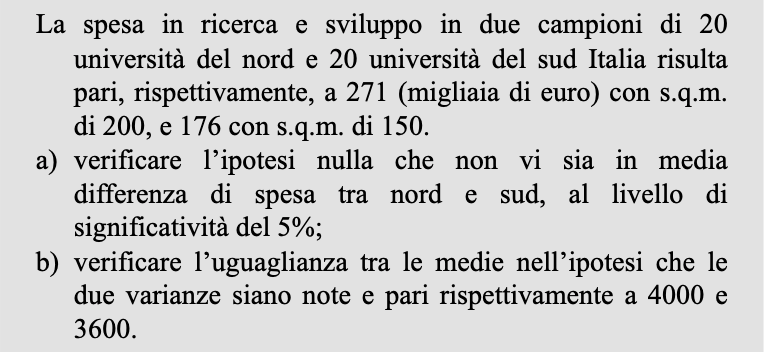
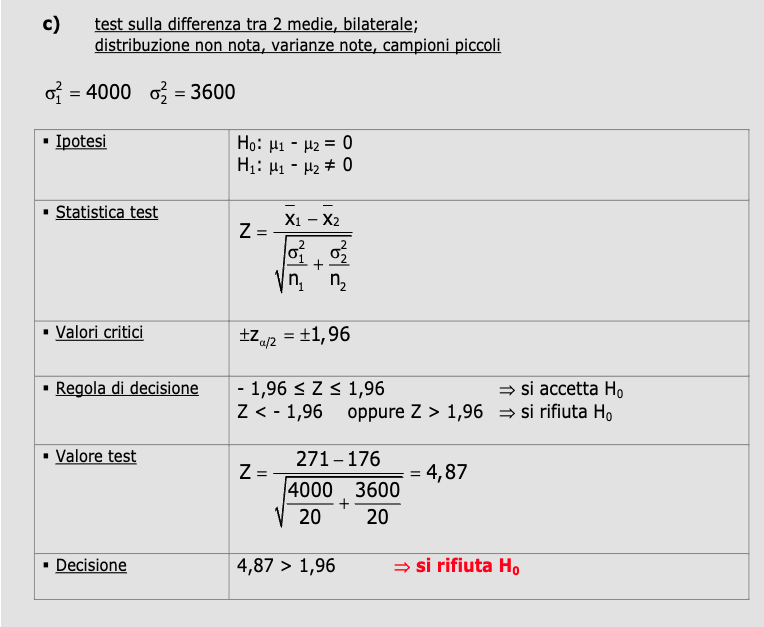

In [13]:
# Campioni
n1 <- n2 <- 20
media_camp1 <- 271
media_camp2 <- 176
# sd_camp1 <- 200
# sd_camp2 <- 150
var_camp1 <- 4000
var_camp2 <- 3600
alpha <- 0.05

# Ipotesi H0: mu1 - mu2 = 0, H1: mu1 - mu2 != 0
# Valori critici
z1 <- qnorm(alpha/2)
z2 <- - qnorm(alpha/2)
cat("Valori critici: ", z1, z2, "\n")

# Calcolo del valore di z
z <- (media_camp1 - media_camp2)/sqrt(var_camp1/n1 + var_camp2/n2)
cat("Valore della statistica test: ", z, "\n")

# Decisione
if (z < z1 | z > z2) {
  cat("Rifiuto H0")
} else {
  cat("NON Rifiuto H0")
}

Valori critici:  -1.959964 1.959964 
Valore della statistica test:  4.873397 
Rifiuto H0

## <span style="color:#e6550d">Test sulla <i><strong><u>differenza tra medie</u></strong></i> con <i><strong><u>varianze NON note</u></strong></i> ma supposte uguali</span>

![Screenshot 2024-01-01 at 10.14.16.png](<attachment:Screenshot 2024-01-01 at 10.14.16.png>)
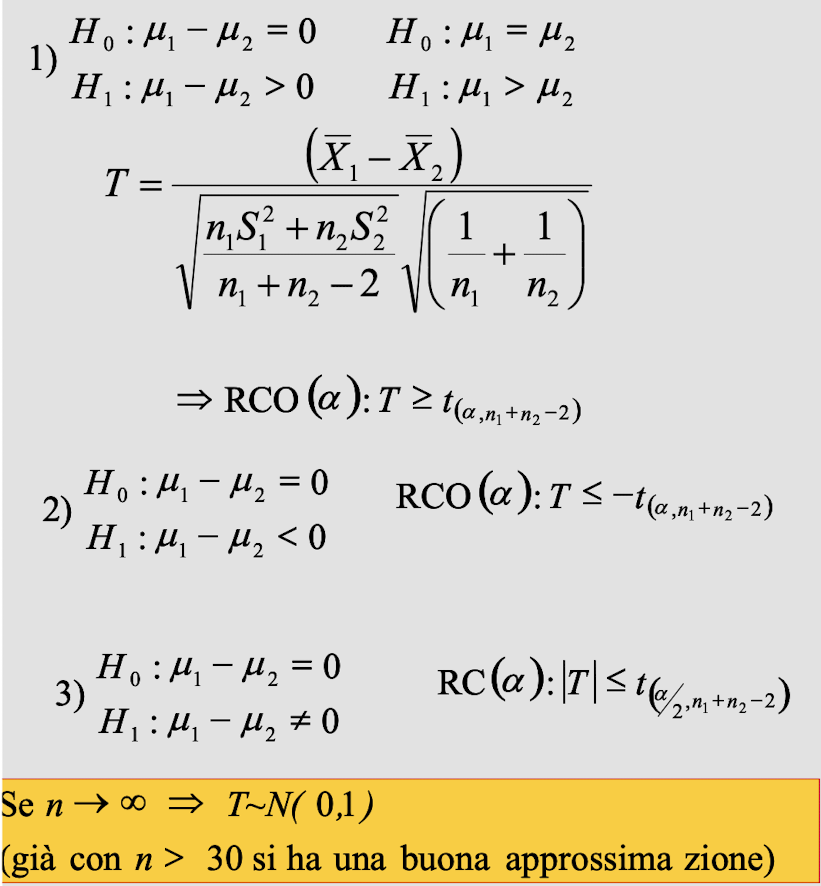

#### <span style="color:#3182bd">Esercizio Lezione</span>

In [14]:
# Null hypothesis: the mean of the population is 0
t.test(PrezzoCH,PrezzoMM,
       var.equal=TRUE) # il prezzo di MM e' mediamente piu' alto di quello di CH

t.test(PrezzoCH,PrezzoMM,
var.equal=TRUE, 
       conf.level = 0.9)


	Two Sample t-test

data:  PrezzoCH and PrezzoMM
t = -7.8519, df = 58, p-value = 1.085e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2940728 -0.1745939
sample estimates:
mean of x mean of y 
 1.836333  2.070667 



	Two Sample t-test

data:  PrezzoCH and PrezzoMM
t = -7.8519, df = 58, p-value = 1.085e-10
alternative hypothesis: true difference in means is not equal to 0
90 percent confidence interval:
 -0.2842193 -0.1844473
sample estimates:
mean of x mean of y 
 1.836333  2.070667 


In [15]:
# Null hypothesis: the mean of the population is -0.2, 
# cioe' il prezzo di MM e' mediamente piu' alto di quello di CH di 0.2
t.test(PrezzoCH,PrezzoMM,mu = - 0.2,
       var.equal=TRUE)

t.test(PrezzoCH,PrezzoMM,mu = - 0.2,
       alternative = "less",
       var.equal=TRUE)


	Two Sample t-test

data:  PrezzoCH and PrezzoMM
t = -1.1504, df = 58, p-value = 0.2547
alternative hypothesis: true difference in means is not equal to -0.2
95 percent confidence interval:
 -0.2940728 -0.1745939
sample estimates:
mean of x mean of y 
 1.836333  2.070667 



	Two Sample t-test

data:  PrezzoCH and PrezzoMM
t = -1.1504, df = 58, p-value = 0.1273
alternative hypothesis: true difference in means is less than -0.2
95 percent confidence interval:
       -Inf -0.1844473
sample estimates:
mean of x mean of y 
 1.836333  2.070667 


In [16]:
# Cambiamo il livello di confidenza
t.test(PrezzoCH,PrezzoMM,var.equal=TRUE, 
       conf.level = 0.9)

# 100 elements sample
t.test(campione$PriceCH,campione$PriceMM,
       var.equal=TRUE,
       conf.level = 0.95)


	Two Sample t-test

data:  PrezzoCH and PrezzoMM
t = -7.8519, df = 58, p-value = 1.085e-10
alternative hypothesis: true difference in means is not equal to 0
90 percent confidence interval:
 -0.2842193 -0.1844473
sample estimates:
mean of x mean of y 
 1.836333  2.070667 



	Two Sample t-test

data:  campione$PriceCH and campione$PriceMM
t = -9.9998, df = 198, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2214829 -0.1485171
sample estimates:
mean of x mean of y 
   1.8603    2.0453 


In [17]:
# Null hypothesis: the mean of the population is < 0
t.test(campione$PriceCH,campione$PriceMM,
       var.equal=TRUE,
       alternative = "less", # test unilaterale a sinistra
       conf.level = 0.95)

# Null hypothesis: the mean of the population is -0.2
t.test(campione$PriceCH,campione$PriceMM, mu = -0.2,
       var.equal=TRUE, conf.level = 0.95)

t.test(campione$PriceCH,campione$PriceMM, mu = -0.2,
       var.equal=TRUE, alternative = "less",
         conf.level = 0.95)

# 30 elements sample
t.test(PrezzoCH,PrezzoMM,
       var.equal=TRUE,
       conf.level = 0.95)


	Two Sample t-test

data:  campione$PriceCH and campione$PriceMM
t = -9.9998, df = 198, p-value < 2.2e-16
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
       -Inf -0.1544267
sample estimates:
mean of x mean of y 
   1.8603    2.0453 



	Two Sample t-test

data:  campione$PriceCH and campione$PriceMM
t = 0.8108, df = 198, p-value = 0.4185
alternative hypothesis: true difference in means is not equal to -0.2
95 percent confidence interval:
 -0.2214829 -0.1485171
sample estimates:
mean of x mean of y 
   1.8603    2.0453 



	Two Sample t-test

data:  campione$PriceCH and campione$PriceMM
t = 0.8108, df = 198, p-value = 0.7908
alternative hypothesis: true difference in means is less than -0.2
95 percent confidence interval:
       -Inf -0.1544267
sample estimates:
mean of x mean of y 
   1.8603    2.0453 



	Two Sample t-test

data:  PrezzoCH and PrezzoMM
t = -7.8519, df = 58, p-value = 1.085e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2940728 -0.1745939
sample estimates:
mean of x mean of y 
 1.836333  2.070667 


In [18]:
# Variance of the two samples are not equal
# In this case we have more variability
t.test(PrezzoCH,PrezzoMM,
       var.equal=FALSE,
       conf.level = 0.95)


	Welch Two Sample t-test

data:  PrezzoCH and PrezzoMM
t = -7.8519, df = 56.21, p-value = 1.324e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2941133 -0.1745533
sample estimates:
mean of x mean of y 
 1.836333  2.070667 


What happen at different degrees of freedom

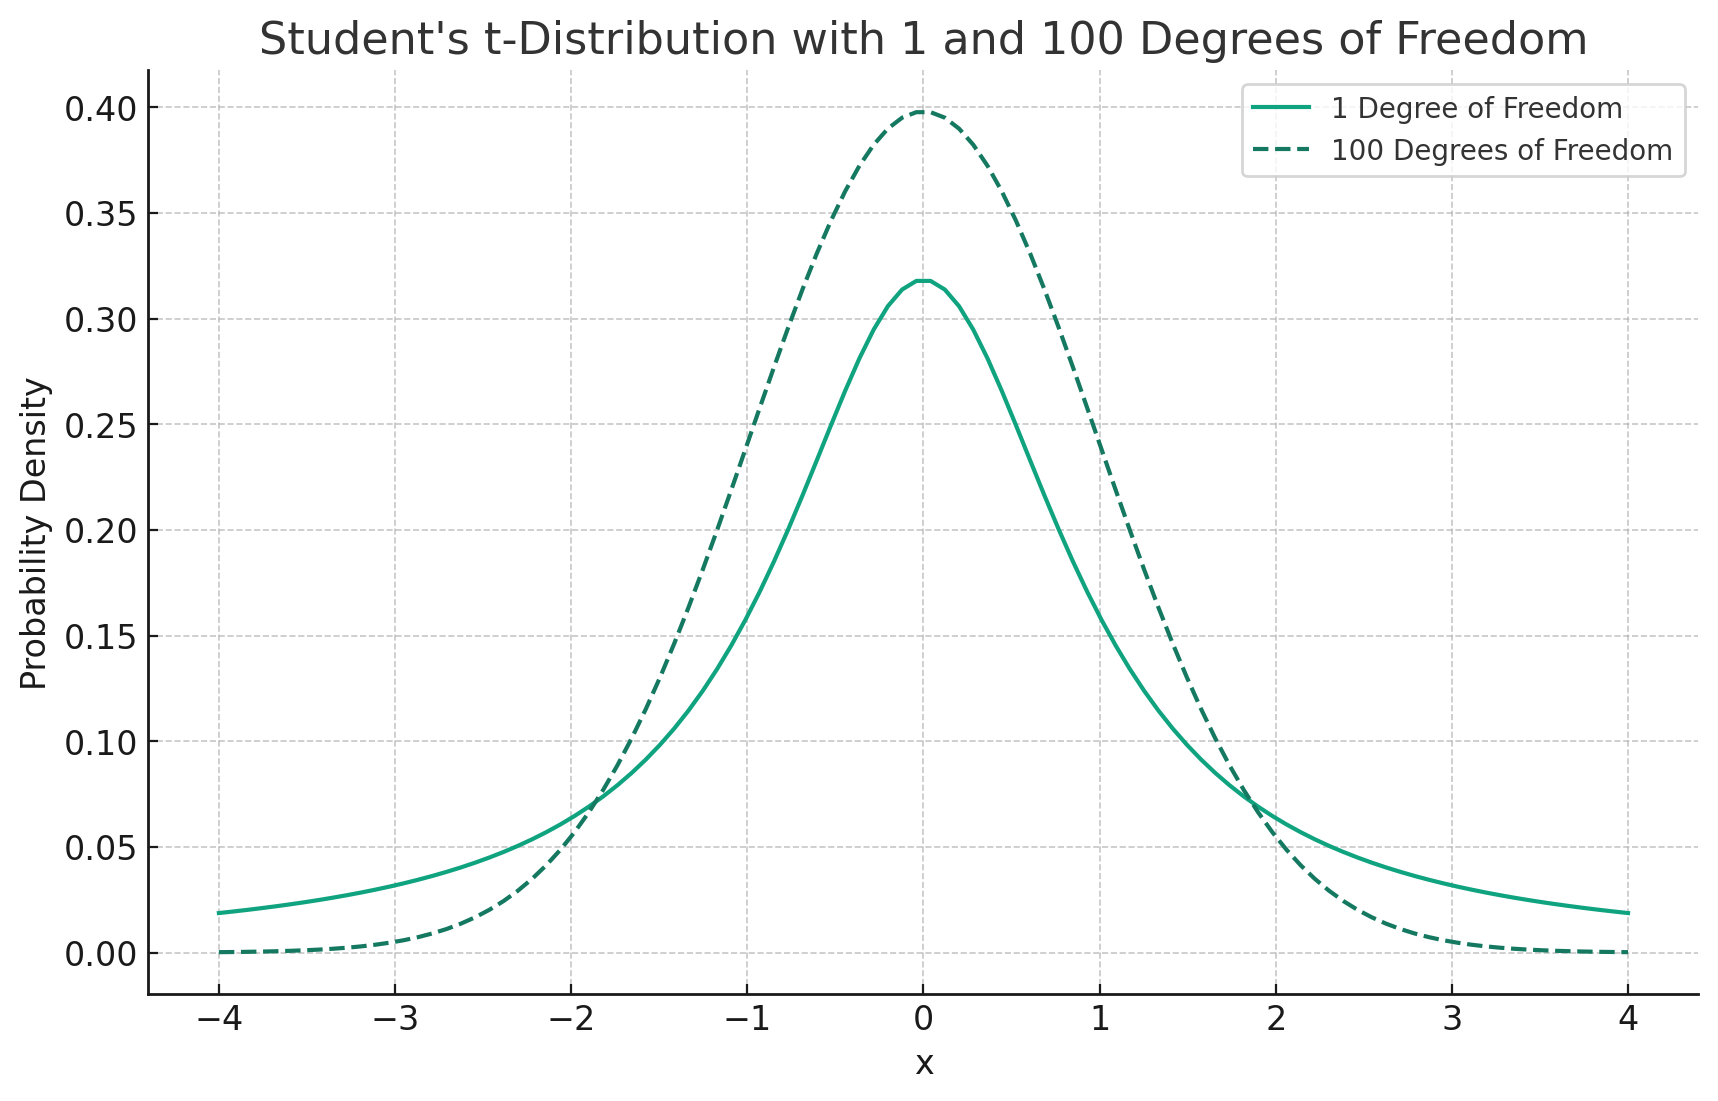

#### <span style="color:#3182bd">Esercizio Slides</span>
verificare l'ipotesi nulla che non vi sia in media differenza di spesa tra nord e sud, al livello di significatività del 5%;

![Screenshot 2024-01-04 at 08.22.22.png](<attachment:Screenshot 2024-01-04 at 08.22.22.png>) ![Screenshot 2024-01-04 at 08.22.33.png](<attachment:Screenshot 2024-01-04 at 08.22.33.png>)
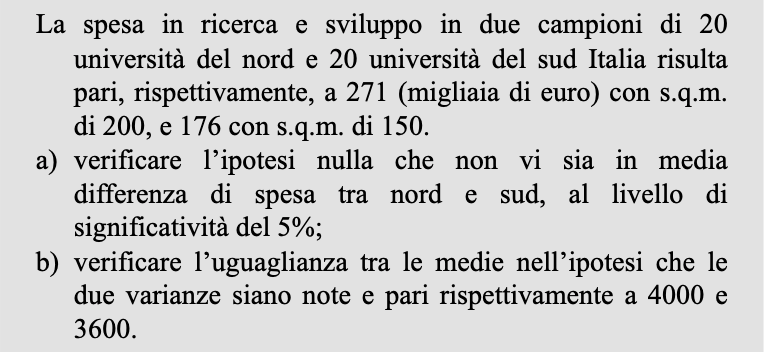
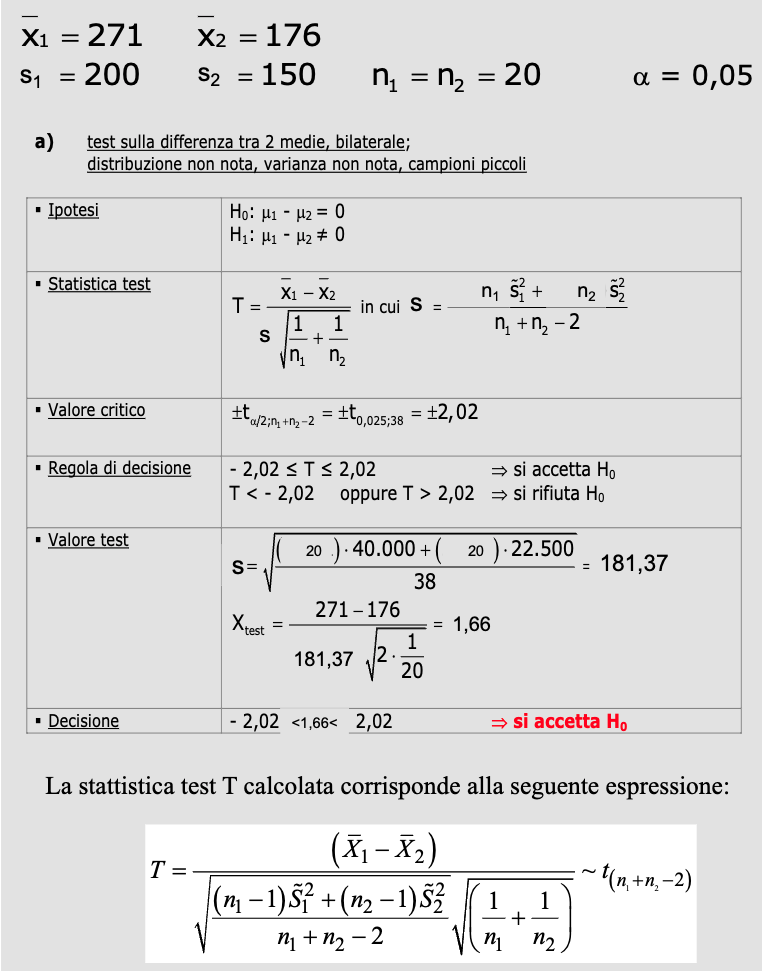

In [19]:
# Campioni
n1 <- n2 <- 20
media_camp1 <- 271
media_camp2 <- 176
sd_camp1 <- 200
sd_camp2 <- 150
# var_camp1 <- 4000
# var_camp2 <- 3600
alpha <- 0.05

# Ipotesi H0: mu1 - mu2 = 0, H1: mu1 - mu2 != 0
# Valori critici
t1 <- qt(alpha/2, df = n1 + n2 - 2)
t2 <- - qt(alpha/2, df = n1 + n2 - 2)
cat("Valori critici: ", t1, t2, "\n")

# Calcolo del valore di t
t <- (media_camp1 - media_camp2)/sqrt(sd_camp1^2/n1 + sd_camp2^2/n2)
cat("Valore della statistica test: ", t, "\n")

# Decisione
if (t < t1 | t > t2) {
  cat("Rifiuto H0")
} else {
  cat("NON Rifiuto H0")
}


Valori critici:  -2.024394 2.024394 
Valore della statistica test:  1.699412 
NON Rifiuto H0

## <span style="color:#e6550d">Test sulla <i><strong><u>varianza</u></strong></i></span>

![Screenshot 2024-01-01 at 10.14.49.png](<attachment:Screenshot 2024-01-01 at 10.14.49.png>)
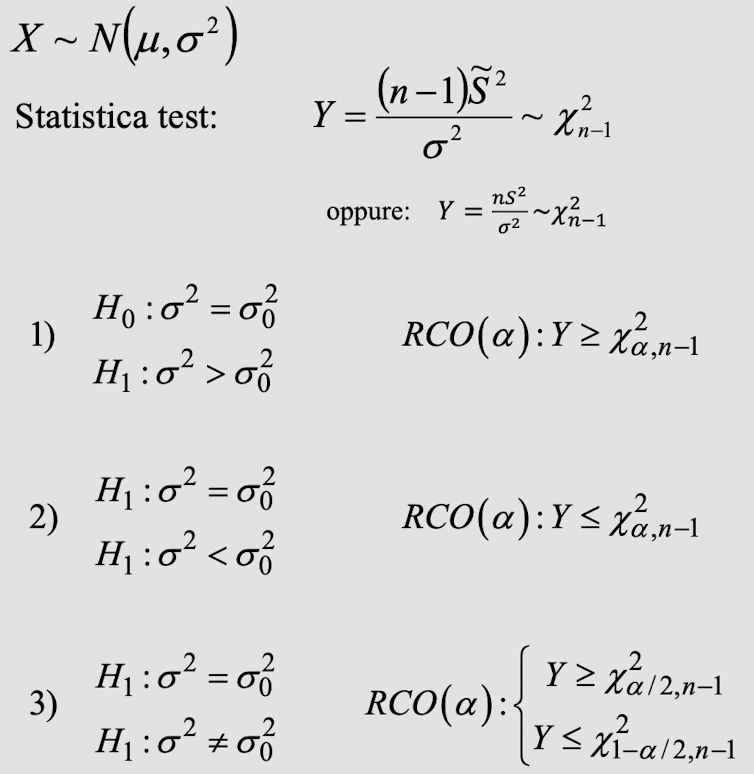

In [20]:
# PrezzoCH
var(PrezzoCH) # 0.01097575 varianza campionaria corretta
var(OJ$PriceCH) # 0.01039783 

# H_0: sigma^2 = 0.010
# H_1: sigma^2 ≠ 0.010
# n = 30
# sigma^2~ = 0.01097575
# alpha = 0.05

n <- length(PrezzoCH)
Y <- ((30 - 1) * var(PrezzoCH)) / 0.010
cat("Valore della statistica di test:", Y, "\n")

# Confrontiamo con i valori critici della distribuzione chi quadro
q0025 <- qchisq(0.025, df = n - 1) # 16.04707
q0975 <- qchisq(0.975, df = n - 1) # 45.72229
cat("Valori critici della distribuzione chi quadro:", q0025, q0975, "\n")
# Non rifiuto l'ipotesi nulla

# media di una distribuzione chi-quadro = n - 1 gradi di liberta'
# qchisq(.5, df = n - 1) # 24.99579
pvalue <- (1 - dchisq(Y, 29)) / 2 # bidirezionale
cat("p-value", pvalue, "\n")

# la media e' 29, che sono i gradi di liberta'
pvalue <- 1 - dchisq(Y, 29) # unidirezionale a destra
cat("p-value unidirezionale a destra", pvalue, "\n")

[1] 0.01097575

[1] 0.01039783

Valore della statistica di test: 31.82967 
Valori critici della distribuzione chi quadro: 16.04707 45.72229 
p-value 0.477763 
p-value unidirezionale a destra 0.955526 


#### <span style="color:#3182bd">Funzione per la Varianza (solo bi-direzionale)</span>

In [21]:
Test_varianza<-function(x, sigma2, alpha=0.05, alternative="two.sided"){
  n <- length(x)
  Y <- ((n-1) * var(x))/sigma2 # Statistica test
  alpha2 <- alpha/2
  q1 <-  qchisq(alpha2, n-1)
  q2 <-  qchisq(1-alpha2, n-1)
  if(Y < q1 | Y > q2) cat("Rifiuto H0", "\n")
  else cat("Non rifiuto H0", "\n")
  cat("La statistica test e pari a", Y, "\n")
  if(Y >= (n-1))
    pvalue <- (1 - dchisq(Y, n-1))/2
  else  pvalue <- (dchisq(Y, n-1))/2 
  cat("il p-value e pari a", pvalue, "\n")
  ris <- c(Y, q1, q2, pvalue)
  cat("La statistica test e pari a", Y, "\n",
      "il p-value e pari a", pvalue, "\n",
      "i valori critici sono", q1, q2, "\n")
  return(ris)
  }

Test_varianza(PrezzoCH, 0.010)

Non rifiuto H0 
La statistica test e pari a 31.82967 
il p-value e pari a 0.477763 
La statistica test e pari a 31.82967 
 il p-value e pari a 0.477763 
 i valori critici sono 16.04707 45.72229 


[1] 31.829667 16.047072 45.722286  0.477763

#### <span style="color:#3182bd">Funzione per la Varianza</span>

In [22]:
Test_varianza <- function(x, sigma2, alpha = 0.05, alternative = "two.sided") {
  n <- length(x)
  Y <- ((n - 1) * var(x)) / sigma2 # Statistica test
  q_lower <- qchisq(alpha, n - 1)
  q_upper <- qchisq(1 - alpha, n - 1)

  if (alternative == "two.sided") {
    if (Y < q_lower || Y > q_upper) cat("Rifiuto H0", "\n")
    else cat("Non rifiuto H0", "\n")
    if(Y >= (n-1))
    pvalue <- (1 - dchisq(Y, n-1))/2
    else  pvalue <- (dchisq(Y, n-1))/2 

  } else if (alternative == "less") {
    if (Y < q_lower) cat("Rifiuto H0", "\n")
    else cat("Non rifiuto H0", "\n")
    pvalue <- pchisq(Y, n - 1)

  } else if (alternative == "greater") {
    if (Y > q_upper) cat("Rifiuto H0", "\n")
    else cat("Non rifiuto H0", "\n")
    pvalue <- 1 - pchisq(Y, n - 1)

  } else {
    stop("Alternative deve essere 'two.sided', 'less', o 'greater'")
  }

  cat("La statistica test è pari a", Y, "\n",
      "il p-value è pari a", pvalue, "\n",
      "i valori critici sono", q_lower, q_upper, "\n")
  
  return(c(Y, q_lower, q_upper, pvalue))
}

Test_varianza(PrezzoCH, 0.010)

Non rifiuto H0 
La statistica test `e pari a 31.82967 
 il p-value `e pari a 0.477763 
 i valori critici sono 17.70837 42.55697 


[1] 31.829667 17.708366 42.556968  0.477763

## <span style="color:#e6550d">Test sul <i><strong><u>rapporto tra varianze</u></strong></i></span>

var.test(x, y, ratio = 1,
         alternative = c("two.sided", "less", "greater"),
         conf.level = 0.95, ...)

In [23]:
# ? var.test
# F di Fisher distribuzione
var.test(PrezzoCH,PrezzoMM,
         alternative="two.sided")
# Non rifiuto l'ipotesi nulla, le varianze sono uguali

var.test(campione$PriceCH,campione$PriceMM,
         alternative="two.sided")

var.test(PrezzoCH,PrezzoMM,
         alternative="less")

var.test(campione$PriceCH,campione$PriceMM,
         alternative="less") # test unilaterale a sinistra, differenze minori di 1


	F test to compare two variances

data:  PrezzoCH and PrezzoMM
F = 0.69712, num df = 29, denom df = 29, p-value = 0.3368
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3318056 1.4646507
sample estimates:
ratio of variances 
         0.6971221 



	F test to compare two variances

data:  campione$PriceCH and campione$PriceMM
F = 0.45681, num df = 99, denom df = 99, p-value = 0.000123
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3073610 0.6789269
sample estimates:
ratio of variances 
         0.4568103 



	F test to compare two variances

data:  PrezzoCH and PrezzoMM
F = 0.69712, num df = 29, denom df = 29, p-value = 0.1684
alternative hypothesis: true ratio of variances is less than 1
95 percent confidence interval:
 0.000000 1.297213
sample estimates:
ratio of variances 
         0.6971221 



	F test to compare two variances

data:  campione$PriceCH and campione$PriceMM
F = 0.45681, num df = 99, denom df = 99, p-value = 6.151e-05
alternative hypothesis: true ratio of variances is less than 1
95 percent confidence interval:
 0.0000000 0.6368216
sample estimates:
ratio of variances 
         0.4568103 


### <span style="color:#31a354">Valore soglia della Dimensione del Campione</span>
Fino a che dimensione del campione rifiuto l'ipotesi nulla? Ciclo for sulla dimensione del campione finche' non trovo un valore di soglia che discrimina la scelta

In [24]:
result <- var.test(PrezzoCH,PrezzoMM,
         alternative="two.sided")
result
result$p.value
cat("p-value", result$p.value, "\n")
cat("statistic", result$statistic, "\n")
cat("conf.int", result$conf.int, "\n")
cat("estimate", result$estimate, "\n")
cat("method", result$method, "\n")
cat("parameter", result$parameter, "\n")
cat("null.value", result$null.value, "\n")
cat("alternative", result$alternative, "\n")


	F test to compare two variances

data:  PrezzoCH and PrezzoMM
F = 0.69712, num df = 29, denom df = 29, p-value = 0.3368
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3318056 1.4646507
sample estimates:
ratio of variances 
         0.6971221 


[1] 0.3367724

p-value 0.3367724 
statistic 0.6971221 
conf.int 0.3318056 1.464651 
estimate 0.6971221 
method F test to compare two variances 
parameter 29 29 
null.value 1 
alternative two.sided 


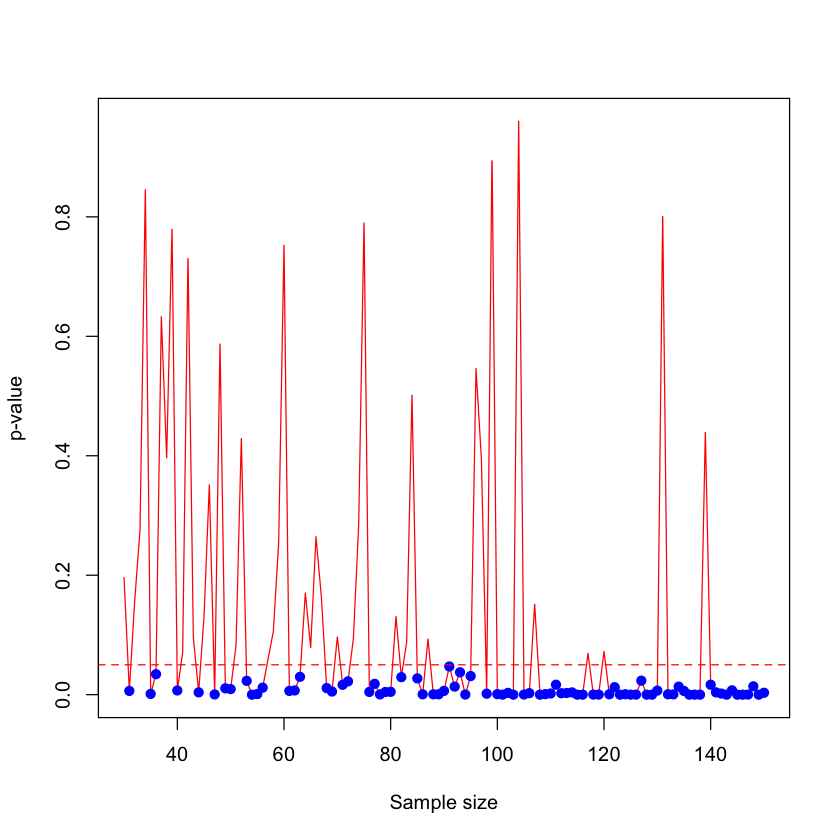

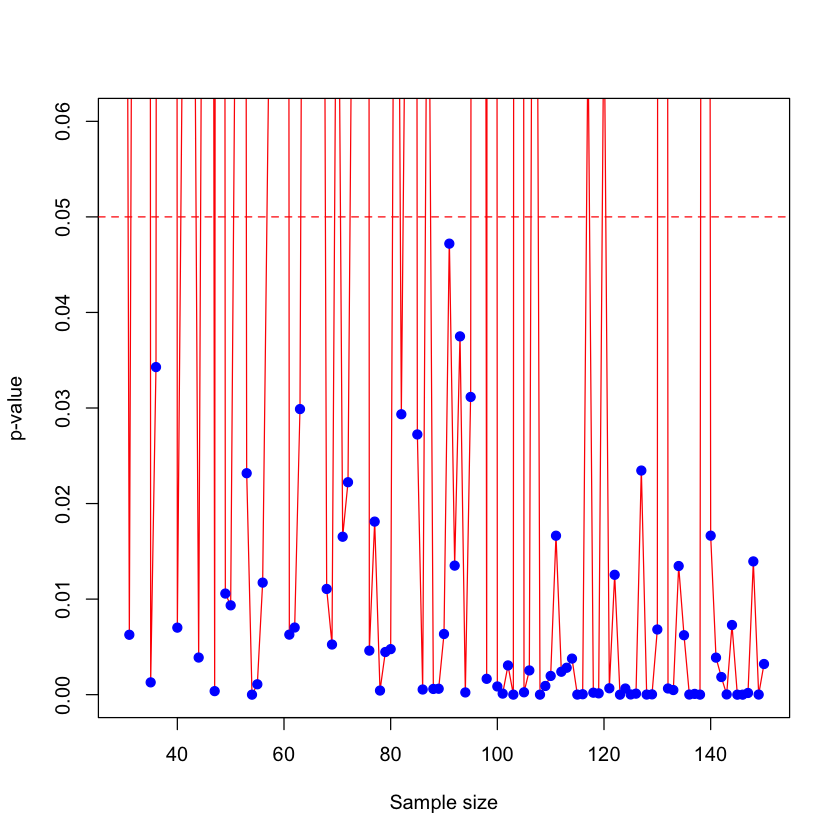

In [25]:
# Create an empty vector to store p-values
vector_pvalue <- c()

for (i in 30:150){
    alpha <- 0.05
    # PrezzoCH <- OJ$PriceCH[1:i]
    # PrezzoMM <- OJ$PriceMM[1:i]

     # Select random sample values
    indices_CH <- sample(1:length(OJ$PriceCH), i)
    indices_MM <- sample(1:length(OJ$PriceMM), i)
    
    PrezzoCH <- OJ$PriceCH[indices_CH]
    PrezzoMM <- OJ$PriceMM[indices_MM]



    result <- var.test(PrezzoCH, PrezzoMM, alternative = "two.sided")
    
    # Append p-value to the vector
    vector_pvalue <- c(vector_pvalue, result$p.value)
}

# Get the indices where p-values are below alpha
indices_below_alpha <- which(vector_pvalue < alpha)
indices_above_alpha <- which(vector_pvalue > alpha)

# Print the vector of p-values below alpha
# print(vector_pvalue[indices_below_alpha])
# print(vector_pvalue[indices_above_alpha])

par(bg = "white")
# par(mfrow = c(1,1))

# Plot for p-values below alpha with x-axis as sample size
plot(30:150, 
    vector_pvalue, 
    type = "l", 
    col = "red", 
    xlab = "Sample size", 
    ylab = "p-value")
points(indices_below_alpha + 29, 
    vector_pvalue[indices_below_alpha], 
    col = "blue", 
    pch = 19)
abline(h = alpha, col = "red", lty = 2)

plot(30:150, 
    vector_pvalue, 
    type = "l", 
    col = "red", 
    xlab = "Sample size", 
    ylab = "p-value",
    ylim = c(0, alpha + 0.01))
points(indices_below_alpha + 29, 
    vector_pvalue[indices_below_alpha], 
    col = "blue", 
    pch = 19)
abline(h = alpha, col = "red", lty = 2)

## <span style="color:#e6550d">Test sul coefficiente di <i><strong><u>correlazione</u></strong></i></span>

cor.test(x, y,
         alternative = c("two.sided", "less", "greater"),
         method = c("pearson", "kendall", "spearman"),
         exact = NULL, conf.level = 0.95, continuity = FALSE, ...)

In [26]:
# ? cor.test
# Correlation between the two samples
cor(PrezzoCH,PrezzoMM)

# Degree of freedom
# The degrees of freedom in this case are 28
# because it's like we are working
# in bivariate context
# (x_i, y_i) i = 1, ..., 30
# insted of
# (x_i),(y_i) i = 1, ..., 30

# Il valore critico non si puo' cambiare
cor.test(PrezzoCH,PrezzoMM, 
         alternative="two.sided")
# La correlazione e' significativamente diversa da 0 nella popolazione

cor.test(PrezzoCH,PrezzoMM, 
         alternative="greater")

[1] -0.04098008


	Pearson's product-moment correlation

data:  PrezzoCH and PrezzoMM
t = -0.49896, df = 148, p-value = 0.6185
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1999286  0.1200700
sample estimates:
        cor 
-0.04098008 



	Pearson's product-moment correlation

data:  PrezzoCH and PrezzoMM
t = -0.49896, df = 148, p-value = 0.6907
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 -0.1748529  1.0000000
sample estimates:
        cor 
-0.04098008 


## <span style="color:#e6550d">Test sulla <i><strong><u>proporzione di successi</u></strong></i></span>

![Screenshot 2024-01-01 at 10.15.48.png](<attachment:Screenshot 2024-01-01 at 10.15.48.png>)
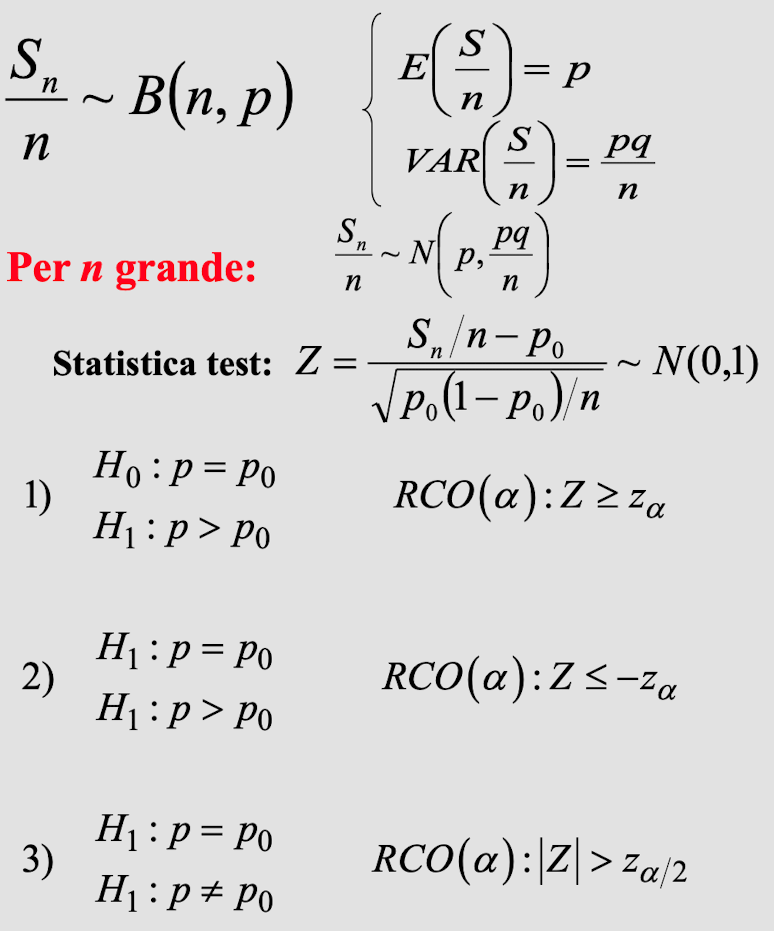

prop.test(x, n, p = NULL,
          alternative = c("two.sided", "less", "greater"),
          conf.level = 0.95, correct = TRUE)

In [27]:
names(OJ)
table(OJ$Purchase)

propCH = 653 / (653 + 417)
cat("Proportion of CH", propCH, "\n")
propMM = 1 - propCH
cat("Proportion of MM", propMM, "\n")

[1] "Purchase"       "WeekofPurchase" "StoreID"        "PriceCH"       
 [5] "PriceMM"        "DiscCH"         "DiscMM"         "SpecialCH"     
 [9] "SpecialMM"      "LoyalCH"        "SalePriceMM"    "SalePriceCH"   
[13] "PriceDiff"      "Store7"         "PctDiscMM"      "PctDiscCH"     
[17] "ListPriceDiff"  "STORE"


 CH  MM 
653 417 

Proportion of CH 0.6102804 
Proportion of MM 0.3897196 


In [28]:
set.seed(123)
# Extract a sample of 200 elements from OJ
ind2<-sample(1:nrow(OJ), size=200, replace=T)
# ind2
campione<-OJ[ind2,]

summary(campione)

 Purchase WeekofPurchase     StoreID       PriceCH         PriceMM     
 CH:127   Min.   :227.0   Min.   :1.0   Min.   :1.690   Min.   :1.690  
 MM: 73   1st Qu.:242.8   1st Qu.:2.0   1st Qu.:1.790   1st Qu.:1.990  
          Median :261.0   Median :4.0   Median :1.860   Median :2.090  
          Mean   :257.3   Mean   :4.1   Mean   :1.873   Mean   :2.077  
          3rd Qu.:271.0   3rd Qu.:7.0   3rd Qu.:1.990   3rd Qu.:2.180  
          Max.   :278.0   Max.   :7.0   Max.   :2.090   Max.   :2.290  
     DiscCH           DiscMM         SpecialCH      SpecialMM    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00   1st Qu.:0.000  
 Median :0.0000   Median :0.0000   Median :0.00   Median :0.000  
 Mean   :0.0648   Mean   :0.1729   Mean   :0.21   Mean   :0.185  
 3rd Qu.:0.0000   3rd Qu.:0.4000   3rd Qu.:0.00   3rd Qu.:0.000  
 Max.   :0.5000   Max.   :0.8000   Max.   :1.00   Max.   :1.000  
    LoyalCH          SalePriceMM  

In [29]:
# Proportions in the samples
propCHcamp = 127/200
cat("Proportion of CH in the sample", propCHcamp, "\n")
propMMcamp = 1 - propCHcamp
cat("Proportion of MM in the sample", propMMcamp, "\n")

dCH = c(127,200)
dMM = c(73,200)

Proportion of CH in the sample 0.635 
Proportion of MM in the sample 0.365 


In [30]:
# ? prop.test
prop.test(127, 200) # test sulla proporzione di successi
# p = 0.5, alternative p ≠ 0.5

# La proporzione campionaria e uguale alla proporzione nella popolazione?
prop.test(127, 200, p = propCH)

prop.test(127, 200, p = propCH, alternative = "g")


	1-sample proportions test with continuity correction

data:  127 out of 200, null probability 0.5
X-squared = 14.045, df = 1, p-value = 0.0001785
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.5637707 0.7009523
sample estimates:
    p 
0.635 



	1-sample proportions test with continuity correction

data:  127 out of 200, null probability propCH
X-squared = 0.41517, df = 1, p-value = 0.5194
alternative hypothesis: true p is not equal to 0.6102804
95 percent confidence interval:
 0.5637707 0.7009523
sample estimates:
    p 
0.635 



	1-sample proportions test with continuity correction

data:  127 out of 200, null probability propCH
X-squared = 0.41517, df = 1, p-value = 0.2597
alternative hypothesis: true p is greater than 0.6102804
95 percent confidence interval:
 0.5750037 1.0000000
sample estimates:
    p 
0.635 


## <span style="color:#e6550d">Test sulla <i><strong><u>differenza tra proporzioni</u></strong></i></span>

![Screenshot 2024-01-01 at 10.16.33.png](<attachment:Screenshot 2024-01-01 at 10.16.33.png>)
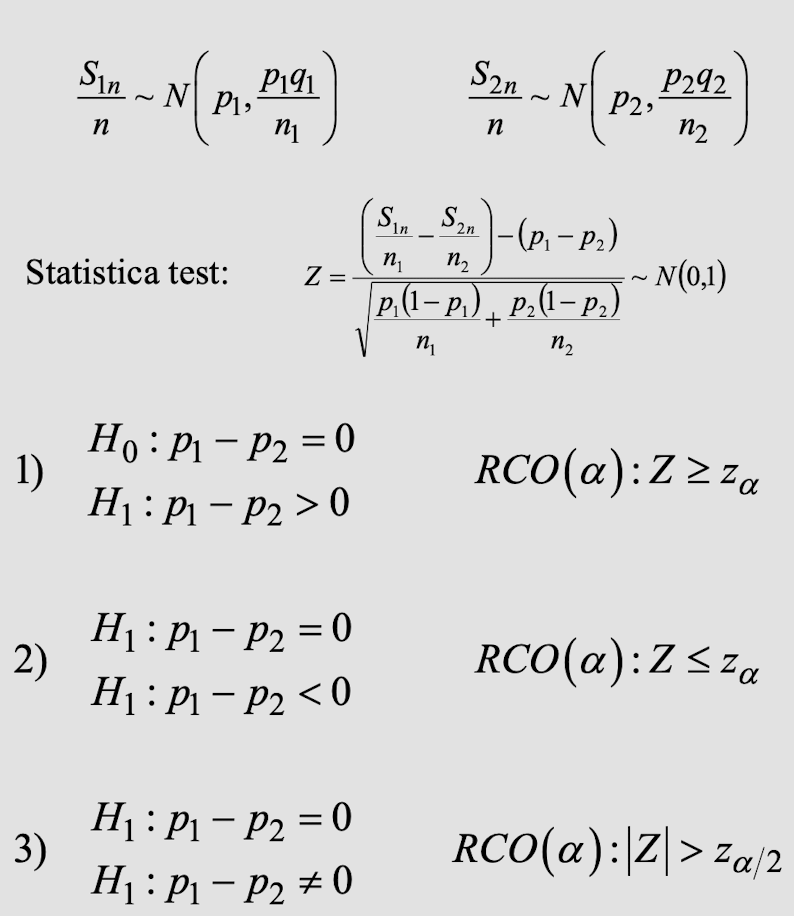

In [31]:
# Confrontare due proporzioni
vnum = c(127,73) # numeratori
vden = c(200,200) # denominatori

# null hypothesis: p1 = p2
# alternative hypothesis: p1 ≠ p2
prop.test(vnum,vden)

# Ha senso solo greater, perche' la differenza e' positiva
# quindi la differenza e' maggiore di 0
prop.test(vnum,vden, alternative = "g")


	2-sample test for equality of proportions with continuity correction

data:  vnum out of vden
X-squared = 28.09, df = 1, p-value = 1.158e-07
alternative hypothesis: two.sided
95 percent confidence interval:
 0.1706414 0.3693586
sample estimates:
prop 1 prop 2 
 0.635  0.365 



	2-sample test for equality of proportions with continuity correction

data:  vnum out of vden
X-squared = 28.09, df = 1, p-value = 5.79e-08
alternative hypothesis: greater
95 percent confidence interval:
 0.1858118 1.0000000
sample estimates:
prop 1 prop 2 
 0.635  0.365 


In [32]:
# change the proportion value
# 0.6 and 0.4 because prop1 = 0.635 and prop2 = 0.365
# L'ipotesi nulla e' che la differenza sia uguale a 0.2
# L'ipotesi alternativa e' che la differenza sia maggiore di 0.2
prop.test(vnum,vden, alternative = "g", p = c(0.6,0.4)) # difference 0.2
#! Even if it's one sided test, the result says two.sided

prop.test(cbind(dCH,dMM),alternative="greater",
          correct=FALSE)


	2-sample test for given proportions with continuity correction

data:  vnum out of vden, null probabilities c(0.6, 0.4)
X-squared = 1.7604, df = 2, p-value = 0.4147
alternative hypothesis: two.sided
null values:
prop 1 prop 2 
   0.6    0.4 
sample estimates:
prop 1 prop 2 
 0.635  0.365 



	2-sample test for equality of proportions without continuity
	correction

data:  cbind(dCH, dMM)
X-squared = 9.7994, df = 1, p-value = 0.0008729
alternative hypothesis: greater
95 percent confidence interval:
 0.06552805 1.00000000
sample estimates:
prop 1 prop 2 
 0.635  0.500 
